## Kaggle - House Prices: Advanced Regression Techniques

#### Brandon Woo

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
train = pd.read_csv("train.csv")

In [94]:
train*2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2,120,RLRL,130.0,16900,PavePave,NaN,RegReg,LvlLvl,AllPubAllPub,InsideInside,GtlGtl,CollgCrCollgCr,NormNorm,NormNorm,1Fam1Fam,2Story2Story,14,10,4006,4006,GableGable,CompShgCompShg,VinylSdVinylSd,VinylSdVinylSd,BrkFaceBrkFace,392.0,GdGd,TATA,PConcPConc,GdGd,TATA,NoNo,GLQGLQ,1412,UnfUnf,0,300,1712,GasAGasA,ExEx,YY,SBrkrSBrkr,1712,1708,0,3420,2,0,4,2,6,2,GdGd,16,TypTyp,0,NaN,AttchdAttchd,4006.0,RFnRFn,4,1096,TATA,TATA,YY,0,122,0,0,0,0,NaN,NaN,NaN,0,4,4016,WDWD,NormalNormal,417000
1,4,40,RLRL,160.0,19200,PavePave,NaN,RegReg,LvlLvl,AllPubAllPub,FR2FR2,GtlGtl,VeenkerVeenker,FeedrFeedr,NormNorm,1Fam1Fam,1Story1Story,12,16,3952,3952,GableGable,CompShgCompShg,MetalSdMetalSd,MetalSdMetalSd,NoneNone,0.0,TATA,TATA,CBlockCBlock,GdGd,TATA,GdGd,ALQALQ,1956,UnfUnf,0,568,2524,GasAGasA,ExEx,YY,SBrkrSBrkr,2524,0,0,2524,0,2,4,0,6,2,TATA,12,TypTyp,2,TATA,AttchdAttchd,3952.0,RFnRFn,4,920,TATA,TATA,YY,596,0,0,0,0,0,NaN,NaN,NaN,0,10,4014,WDWD,NormalNormal,363000
2,6,120,RLRL,136.0,22500,PavePave,NaN,IR1IR1,LvlLvl,AllPubAllPub,InsideInside,GtlGtl,CollgCrCollgCr,NormNorm,NormNorm,1Fam1Fam,2Story2Story,14,10,4002,4004,GableGable,CompShgCompShg,VinylSdVinylSd,VinylSdVinylSd,BrkFaceBrkFace,324.0,GdGd,TATA,PConcPConc,GdGd,TATA,MnMn,GLQGLQ,972,UnfUnf,0,868,1840,GasAGasA,ExEx,YY,SBrkrSBrkr,1840,1732,0,3572,2,0,4,2,6,2,GdGd,12,TypTyp,2,TATA,AttchdAttchd,4002.0,RFnRFn,4,1216,TATA,TATA,YY,0,84,0,0,0,0,NaN,NaN,NaN,0,18,4016,WDWD,NormalNormal,447000
3,8,140,RLRL,120.0,19100,PavePave,NaN,IR1IR1,LvlLvl,AllPubAllPub,CornerCorner,GtlGtl,CrawforCrawfor,NormNorm,NormNorm,1Fam1Fam,2Story2Story,14,10,3830,3940,GableGable,CompShgCompShg,Wd SdngWd Sdng,Wd ShngWd Shng,NoneNone,0.0,TATA,TATA,BrkTilBrkTil,TATA,GdGd,NoNo,ALQALQ,432,UnfUnf,0,1080,1512,GasAGasA,GdGd,YY,SBrkrSBrkr,1922,1512,0,3434,2,0,2,0,6,2,GdGd,14,TypTyp,2,GdGd,DetchdDetchd,3996.0,UnfUnf,6,1284,TATA,TATA,YY,0,70,544,0,0,0,NaN,NaN,NaN,0,4,4012,WDWD,AbnormlAbnorml,280000
4,10,120,RLRL,168.0,28520,PavePave,NaN,IR1IR1,LvlLvl,AllPubAllPub,FR2FR2,GtlGtl,NoRidgeNoRidge,NormNorm,NormNorm,1Fam1Fam,2Story2Story,16,10,4000,4000,GableGable,CompShgCompShg,VinylSdVinylSd,VinylSdVinylSd,BrkFaceBrkFace,700.0,GdGd,TATA,PConcPConc,GdGd,TATA,AvAv,GLQGLQ,1310,UnfUnf,0,980,2290,GasAGasA,ExEx,YY,SBrkrSBrkr,2290,2106,0,4396,2,0,4,2,8,2,GdGd,18,TypTyp,2,TATA,AttchdAttchd,4000.0,RFnRFn,6,1672,TATA,TATA,YY,384,168,0,0,0,0,NaN,NaN,NaN,0,24,4016,WDWD,NormalNormal,500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2912,120,RLRL,124.0,15834,PavePave,NaN,RegReg,LvlLvl,AllPubAllPub,InsideInside,GtlGtl,GilbertGilbert,NormNorm,NormNorm,1Fam1Fam,2Story2Story,12,10,3998,4000,GableGable,CompShgCompShg,VinylSdVinylSd,VinylSdVinylSd,NoneNone,0.0,TATA,TATA,PConcPConc,GdGd,TATA,NoNo,UnfUnf,0,UnfUnf,0,1906,1906,GasAGasA,ExEx,YY,SBrkrSBrkr,1906,1388,0,3294,0,0,4,2,6,2,TATA,14,TypTyp,2,TATA,AttchdAttchd,3998.0,RFnRFn,4,920,TATA,

In [4]:
train = train.set_index("Id")

In [5]:
test = pd.read_csv("test.csv")

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
pd.set_option('display.max_columns', 81)

In [8]:
train.isnull().sum()/len(train)*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [9]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
from collections import Counter
Counter(train.isna().any())

Counter({False: 61, True: 19})

In [11]:
train.fillna(train.mean(),inplace=True)
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [12]:
Counter(train.isna().any())

Counter({False: 64, True: 16})

### Data Cleaning
So far I just read given data training and testing data sets on houses. The first thing that came to mind was to start check the data quality and cleaning the data. This meant I wanted to look for any columns with NaN and bad values that did not make sense. At first there were about 19 columns that had missing or bad values. I then replaced the numerical columns that had NaN with the mean values of the column. This decreased the count of bad columns to 16. I realized that the other columns that needed to be fixed were categorical. I believe these values are harder to fix, I could have used the mode to replace the NaN or not used that column at all. But then I realized after reading the data_description.txt, any categorical columns that contained the values NaN really meant that there was none of that specific object. So I decided to just change the value to none, because the data was correct.

In [13]:
train.fillna("None",inplace=True)

In [14]:
Counter(train.isna().any())

Counter({False: 80})

In [15]:
numerical_columns = train.var()

In [16]:
numerical_columns

MSSubClass       1.789338e+03
LotFrontage      4.850576e+02
LotArea          9.962565e+07
OverallQual      1.912679e+00
OverallCond      1.238322e+00
YearBuilt        9.122154e+02
YearRemodAdd     4.262328e+02
MasVnrArea       3.260520e+04
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364204e+03
GrLivArea        2.761296e+05
BsmtFullBath     2.692682e-01
BsmtHalfBath     5.700283e-02
FullBath         3.035082e-01
HalfBath         2.528937e-01
BedroomAbvGr     6.654938e-01
KitchenAbvGr     4.854892e-02
TotRmsAbvGrd     2.641903e+00
Fireplaces       4.155947e-01
GarageYrBlt      5.757400e+02
GarageCars       5.584797e-01
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595059e+02
ScreenPorch      3.108889e+03
PoolArea         1.614216e+03
MiscVal   

### Feature Selection

So here I calculated the variance for all of the numerical features. What I am trying to do is to reduce the number of features in a dataset without havng to lose too much information. I am trying to improve the model by using dimensionality reduction techniques. Hopefully the model will run faster and remove redundant features since there are less dimensions. This is a variance check, we don't want the feautres in out dataset to have the same values or bring the same insights. Zero variance will lead to no difference in prediction.

In [17]:
dict(reversed(sorted(zip(numerical_columns.values, numerical_columns.keys()))))

{6311111264.297451: 'SalePrice',
 99625649.6503417: 'LotArea',
 276129.63336259616: 'GrLivArea',
 246138.0553972849: 'MiscVal',
 208025.46846873628: 'BsmtFinSF1',
 195246.40617940607: 'BsmtUnfSF',
 192462.36170908928: 'TotalBsmtSF',
 190557.0753373038: '2ndFlrSF',
 149450.07920371392: '1stFlrSF',
 45712.51022890529: 'GarageArea',
 32605.204362303895: 'MasVnrArea',
 26023.90777883106: 'BsmtFinSF2',
 15709.813369543657: 'WoodDeckSF',
 4389.861203488976: 'OpenPorchSF',
 3735.5503258002063: 'EnclosedPorch',
 3108.889358915411: 'ScreenPorch',
 2364.204048090632: 'LowQualFinSF',
 1789.338306402389: 'MSSubClass',
 1614.215993315013: 'PoolArea',
 912.2154126019891: 'YearBuilt',
 859.5058709756354: '3SsnPorch',
 575.7400257758463: 'GarageYrBlt',
 485.0575753926782: 'LotFrontage',
 426.2328222558135: 'YearRemodAdd',
 7.309594674528473: 'MoSold',
 2.6419033490756916: 'TotRmsAbvGrd',
 1.9126794482991696: 'OverallQual',
 1.763836649234308: 'YrSold',
 1.2383223637883065: 'OverallCond',
 0.6654938173

I printed out the variance scores for all the numerical features, and ordered them by their variance from greatest to least. I came to the realization that the variance becomes less impactful once it hits around the OpenPorchSF and another cut off at MoSold. I decided I didn't want to cut out too many features, so I cut off OpenPorchSF and down.

In [18]:
for each in numerical_columns.keys():
    if numerical_columns[each] <= 5000:
        train.drop(each,1,inplace=True)
train

,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,1710,Gd,Typ,None,Attchd,RFn,548,TA,TA,Y,0,None,None,None,0,WD,Normal,208500
2,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,TA,Typ,TA,Attchd,RFn,460,TA,TA,Y,298,None,None,None,0,WD,Normal,181500
3,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,1786,Gd,Typ,TA,Attchd,RFn,608,TA,TA,Y,0,None,None,None,0,WD,Normal,223500
4,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,1717,Gd,Typ,Gd,Detchd,Unf,642,TA,TA,Y,0,None,None,None,0,WD,Abnorml,140000
5,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,Gd,Typ,TA,Attchd,RFn,836,TA,TA,Y,192,None,None,None,0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,1647,TA,Typ,TA,Attchd,RFn,460,TA,TA,Y,0,None,None,None,0,WD,Normal,175000
1457,RL,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,2073,TA,Min1,TA,Attchd,Unf,500,TA,TA,Y,349,None,MnPrv,None,0,WD,Normal,210000
1458,RL,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,2340,Gd,Typ,Gd,Attchd,RFn,252,TA,TA,Y,0,None,GdPrv,Shed,2500,WD,Normal,266500


In [19]:
trainSP = train["SalePrice"]
train.drop("SalePrice",1,inplace=True) #Target Column
trainSP.shape

(1460,)

In [20]:
tcorr = train.corr()
tcorr

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,MiscVal
LotArea,1.000000,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.263116,0.180403,0.171698,0.038068
MasVnrArea,0.103960,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,0.389893,0.372567,0.159349,-0.029815
BsmtFinSF1,0.214103,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.296970,0.204306,0.003571
BsmtFinSF2,0.111170,-0.072302,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,-0.009640,-0.018227,0.067898,0.004940
BsmtUnfSF,-0.002618,0.114184,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.240257,0.183303,-0.005316,-0.023837
TotalBsmtSF,0.260833,0.362452,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.486665,0.232019,-0.018479
1stFlrSF,0.299475,0.342160,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,0.566024,0.489782,0.235459,-0.021096
2ndFlrSF,0.050986,0.174019,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.687501,0.138347,0.092165,0.016197
GrLivArea,0.263116,0.389893,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,1.000000,0.468997,0.247433,-0.002416
GarageArea,0.180403,0.372567,0.296970,-0.018227,0.183303,0.486665,0.489782,0.138347,0.468997,1.000000,0.224666,-0.027400


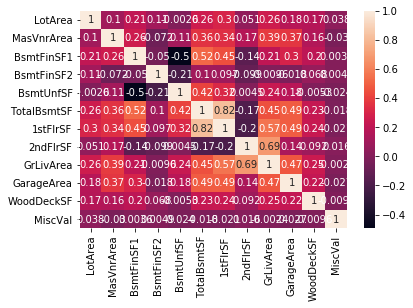

In [21]:
sns.heatmap(tcorr,annot=True)
plt.show()

### Correlation Check
So here I did a correlation check. I wanted to find out the features that have high correlation with each other. Having features that have similar information can bring the performance down of the models. So above I computer a correlation matrix. I considered dropping the values when the pair of features had a correlation greater than 0.5. The features that I noticed that surpassed this threshold were TotalBsmtSF and GrLivArea. This makes total sense because if we take a look at the data_description.txt we can see that both of these features are summations of two other seperate features(BsMtFinSF1&2 and 1st&2ndFlrSF). They are the total square feet of the basement and living area respectively. Since these features are redudant that is why the correlation values are so high. So I took this features out.

In [22]:
train.drop("TotalBsmtSF",1,inplace=True)
train.drop("GrLivArea",1,inplace=True)
train.head(12)

,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,GasA,Ex,Y,SBrkr,856,854,Gd,Typ,None,Attchd,RFn,548,TA,TA,Y,0,None,None,None,0,WD,Normal
2,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,GasA,Ex,Y,SBrkr,1262,0,TA,Typ,TA,Attchd,RFn,460,TA,TA,Y,298,None,None,None,0,WD,Normal
3,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,GasA,Ex,Y,SBrkr,920,866,Gd,Typ,TA,Attchd,RFn,608,TA,TA,Y,0,None,None,None,0,WD,Normal
4,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,GasA,Gd,Y,SBrkr,961,756,Gd,Typ,Gd,Detchd,Unf,642,TA,TA,Y,0,None,None,None,0,WD,Abnorml
5,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,GasA,Ex,Y,SBrkr,1145,1053,Gd,Typ,TA,Attchd,RFn,836,TA,TA,Y,192,None,None,None,0,WD,Normal
6,RL,14115,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,GasA,Ex,Y,SBrkr,796,566,TA,Typ,None,Attchd,Unf,480,TA,TA,Y,40,None,MnPrv,Shed,700,WD,Normal
7,RL,10084,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,GasA,Ex,Y,SBrkr,1694,0,Gd,Typ,Gd,Attchd,RFn,636,TA,TA,Y,255,None,None,None,0,WD,Normal
8,RL,10382,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,GasA,Ex,Y,SBrkr,1107,983,TA,Typ,TA,Attchd,RFn,484,TA,TA,Y,235,None,None,Shed,350,WD,Normal
9,RM,6120,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,GasA,Gd,Y,FuseF,1022,752,TA,Min1,TA,Detchd,Unf,468,Fa,TA,Y,90,None,None,None,0,WD,Abnorml


In [23]:
Counter(train["MiscVal"])

Counter({0: 1408,
         700: 5,
         350: 1,
         500: 8,
         400: 11,
         480: 2,
         450: 4,
         15500: 1,
         1200: 2,
         800: 1,
         2000: 4,
         600: 4,
         3500: 1,
         1300: 1,
         54: 1,
         620: 1,
         560: 1,
         1400: 1,
         8300: 1,
         1150: 1,
         2500: 1})

In [24]:
(train["LotArea"]).mean()

10516.828082191782

### My 5 new features are ...


- Sum of BsmtQual and Bsmt Cond
- Average of 1stFlrSF and 2ndFlrSF
- Sum of GarageQual and GarageCond
- Misc Values > 0
- LotArea > 10000

In [25]:
bsmtnum = {"BsmtQual":     {"NA": 0, "Po": 1, "Fa": 2, "TA": 3,
                                  "Gd": 4, "Ex": 5},
                "BsmtCond": {"NA": 0, "Po": 1, "Fa": 2, "TA": 3,
                                  "Gd": 4, "Ex": 5}}

In [26]:
train.replace(bsmtnum,inplace = True)

In [27]:
train["SumBsmt"] = train["BsmtQual"] + train["BsmtCond"]

In [28]:
train["AvgFlr"] = (train["1stFlrSF"] + train["2ndFlrSF"])/2

In [29]:
garagenum = {"GarageQual":     {"NA": 0, "Po": 1, "Fa": 2, "TA": 3,
                                  "Gd": 4, "Ex": 5},
                "GarageCond": {"NA": 0, "Po": 1, "Fa": 2, "TA": 3,
                                  "Gd": 4, "Ex": 5}}

In [30]:
train.replace(garagenum,inplace = True)

In [31]:
train["SumGarage"] = train["GarageQual"] + train["GarageCond"]

In [32]:
train["MiscYes"] = np.where(train["MiscVal"]>0,True,False)

In [33]:
train["greaterThanAvgLotArea"] = np.where(train["LotArea"]> train["LotArea"].mean(),True,False)

In [34]:
train.head()

,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SumBsmt,AvgFlr,SumGarage,MiscYes,greaterThanAvgLotArea
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,4,3,No,GLQ,706,Unf,0,150,GasA,Ex,Y,SBrkr,856,854,Gd,Typ,None,Attchd,RFn,548,3,3,Y,0,None,None,None,0,WD,Normal,7,855.0,6,False,False
2,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,4,3,Gd,ALQ,978,Unf,0,284,GasA,Ex,Y,SBrkr,1262,0,TA,Typ,TA,Attchd,RFn,460,3,3,Y,298,None,None,None,0,WD,Normal,7,631.0,6,False,False
3,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,4,3,Mn,GLQ,486,Unf,0,434,GasA,Ex,Y,SBrkr,920,866,Gd,Typ,TA,Attchd,RFn,608,3,3,Y,0,None,None,None,0,WD,Normal,7,893.0,6,False,True
4,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,3,4,No,ALQ,216,Unf,0,540,GasA,Gd,Y,SBrkr,961,756,Gd,Typ,Gd,Detchd,Unf,642,3,3,Y,0,None,None,None,0,WD,Abnorml,7,858.5,6,False,False
5,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,4,3,Av,GLQ,655,Unf,0,490,GasA,Ex,Y,SBrkr,1145,1053,Gd,Typ,TA,Attchd,RFn,836,3,3,Y,192,None,None,None,0,WD,Normal,7,1099.0,6,False,True


In [35]:
temp = train

### Reasons for each feature

So how I chose my five new features were based off the variance and correlation scores and what I believed to be a huge role in predictivity. I used feature engineering techniques such as interacting with features, placing indicators on variables, and feature representation. Creating new features from my already existing ones help to improve the model performance. I also tried to make any categorical column into numerical if I was using it. So the first feature was based off the basement stats and data. In the variation test, it was clear that basement had a huge role in the variance of the data. So I decided to merge the data on the basement's area, maybe to see if people prefer a larger finished basement. Then I chose, the average of the first and second floor because the variance scores for both were also high. Then I did the same thing with the basement for the garage. As you can see I am basically clustering the data as if I am classifying parts of the house. Then I wanted to see if miscellaneous values/add ons and lot area also affected the predictions. These data points were the highest when it came to variance score.

In [36]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(random_state=9)
train=pd.get_dummies(train)
RFR.fit(train,trainSP)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=9, verbose=0, warm_start=False)

In [37]:
train

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,GarageArea,WoodDeckSF,MiscVal,AvgFlr,MiscYes,greaterThanAvgLotArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,...,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SumBsmt_3,SumBsmt_4,SumBsmt_5,SumBsmt_6,SumBsmt_7,SumBsmt_8,SumBsmt_9,SumBsmt_NoneNone,SumGarage_2,SumGarage_3,SumGarage_4,SumGarage_5,SumGarage_6,SumGarage_7,SumGarage_8,SumGarage_10,SumGarage_NoneNone
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,8450,196.0,706,0,150,856,854,548,0,0,855.0,False,False,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,9600,0.0,978,0,284,1262,0,460,298,0,631.0,False,False,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,11250,162.0,486,0,434,920,866,608,0,0,893.0,False,True,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,9550,0.0,216,0,540,961,756,642,0,0,858.5,False,False,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
5,14260,350.0,655,0,490,1145,1053,836,192,0,1099.0,False,True,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,7917,0.0,0,0,953,953,694,460,0,0,823.5,False,False,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1457,13175,119.0,790,163,589,2073,0,500,349,0,1036.5,False,True,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1458,9042,0.0,275,0,877,1188,1152,252,0,2500,1170.0,True,False,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [38]:
# train.columns.values
# RFR.feature_importances_

# uncomment if you want to see the column values and features of importances

In [39]:
# dict(reversed(sorted(zip(RFR.feature_importances_, train.columns.values))))

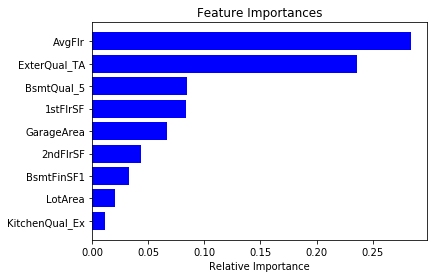

In [40]:
features = train.columns
importances = RFR.feature_importances_
indices = np.argsort(importances)[-9:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Feature Importances

To choose my 10 features, I used Random Forest to find the features' importances. I converted all the data into numeric form to continue this process, which created more columns. This was done by using pd.get_dummies. After fitting the model, I ended up with columns and feature of importances. To organize and create visuals I zipped together the data and sorted it. It was then plotted on a bar chart. The top ten features of importance ended up being: avgflr, exterqual_TA, bsmtqual_5, 1stflrSF, garageArea, 2ndFlrSF, bsmtFinSF1, LotArea, and kitchequal_ex. This actually supports my predictions that clustering the house into seperate groups of importances actually was useful. Since the features labeled above do the same, each important feature is basically a different part of the house.

# Linear Regression

In [41]:
trainLR =pd.DataFrame({"AvgFlr": train["AvgFlr"]})

In [42]:
trainLR.shape

(1460, 1)

In [43]:
trainLR

,AvgFlr
Id,
1,855.0
2,631.0
3,893.0
4,858.5
5,1099.0
...,...
1456,823.5
1457,1036.5
1458,1170.0


In [44]:
trainLR.describe()

,AvgFlr
count,1460.000000
mean,754.809589
std,260.581761
min,167.000000
25%,561.875000
50%,729.000000
75%,887.625000
max,2821.000000


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = trainLR.values.reshape(-1,1)
y = trainSP.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state=9)
linreg = LinearRegression().fit(X_train,y_train)

In [46]:
print(linreg.intercept_)
print(linreg.coef_)

[20184.91147007]
[[211.83937376]]


In [47]:
y_pred = linreg.predict(X_test)
#y_pred

In [48]:
df1 = pd.DataFrame({'Actual':y_test.flatten(),'Predicted': y_pred.flatten()})
df1

,Actual,Predicted
0,151400,287208.442096
1,241500,164553.444688
2,82000,142204.390756
3,162000,147712.214474
4,140000,165824.480931
...,...,...
360,176000,140615.595453
361,85500,112229.119369
362,79000,102166.749116
363,163990,174403.975568


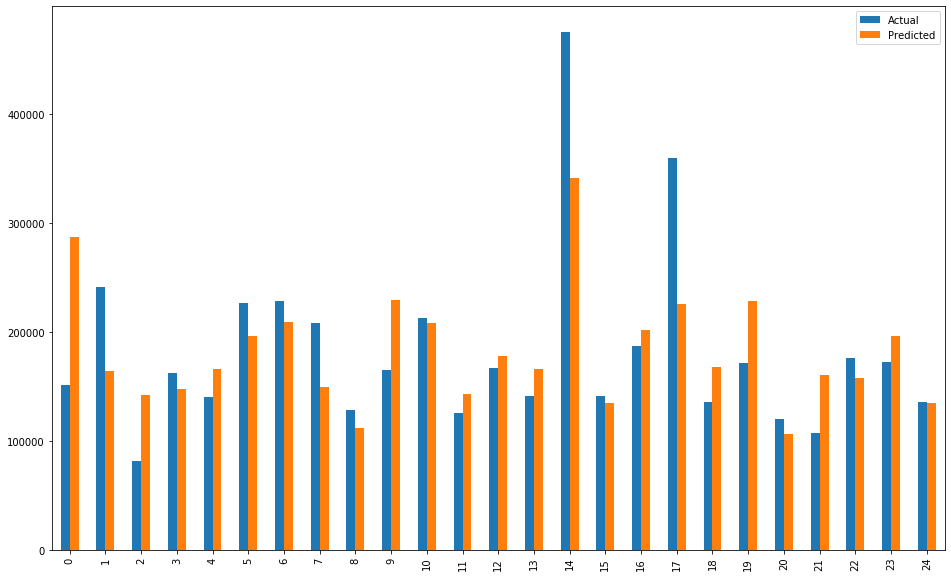

In [49]:
df1head = df1.head(25)
df1head.plot(kind='bar',figsize=(16,10))
plt.show()

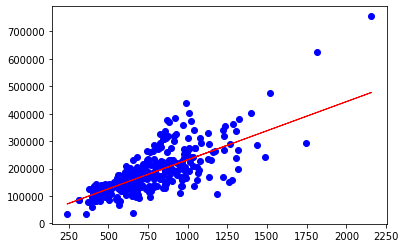

In [50]:
plt.scatter(X_test,y_test,color="blue")
plt.plot(X_test,y_pred,color='red',linewidth=1)
plt.show()

In [51]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 36518.168247191315
Mean Squared Error: 2843124960.2744913
Root Mean Squared Error: 53320.961734335695
R-squared Error: 0.55874675395604


### Analysis

My first machine learning algorithm that I implemented was linear regression. For this model I used the feature of average floor. I chose this feature first because it was the feature that had the most importance and also it was the feature that I created by take the average of the two floor features given.
I believed that the average floor was important and strong enough to be able to predict the values of sales price. The results of the data weren't so great. There were times when the data seemed like they data was predicted pretty well, but there were times where it was way off. Thats why it seems that the mean absoulte error, mean squared error, and root mean squared error is so high. The r squared error, which represents the coefficient of how well the values fit compared to the original values, is a little bit over 50%. Which supports what I stated before, where some predictions were spot on and other times way off.

# KNN 


In [52]:
trainKNN = pd.DataFrame({"GarageArea": train["GarageArea"], "LotArea": train["LotArea"]})
trainKNN

,GarageArea,LotArea
Id,,
1,548,8450
2,460,9600
3,608,11250
4,642,9550
5,836,14260
...,...,...
1456,460,7917
1457,500,13175
1458,252,9042


In [53]:
trainKNN.shape

(1460, 2)

In [54]:
trainSP.shape

(1460,)

In [55]:
trainKNN.describe()

,GarageArea,LotArea
count,1460.000000,1460.000000
mean,472.980137,10516.828082
std,213.804841,9981.264932
min,0.000000,1300.000000
25%,334.500000,7553.500000
50%,480.000000,9478.500000
75%,576.000000,11601.500000
max,1418.000000,215245.000000


In [56]:
trainKNN.head()

,GarageArea,LotArea
Id,,
1,548,8450
2,460,9600
3,608,11250
4,642,9550
5,836,14260


In [57]:
X = np.array(trainKNN)
X

array([[  548,  8450],
       [  460,  9600],
       [  608, 11250],
       ...,
       [  252,  9042],
       [  240,  9717],
       [  276,  9937]], dtype=int64)

In [58]:
trainSP.mean()

180921.19589041095

In [59]:
y = np.array(trainSP)
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [60]:
y = np.where(y >= y.mean(), 1 , 0)
Counter(y)

Counter({1: 560, 0: 900})

In [61]:
trainSP.shape

(1460,)

In [62]:
from sklearn import metrics, neighbors, preprocessing, model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [63]:
accuracy = knn.score(X_test, y_test)
accuracy

0.7287671232876712

In [64]:
from sklearn.metrics import confusion_matrix  
pred=knn.predict(X_test)
cm = confusion_matrix(y_test, pred)  
cm

array([[186,  44],
       [ 55,  80]], dtype=int64)

In [65]:
knn.score(X_test, y_test)

0.7287671232876712

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       230
           1       0.65      0.59      0.62       135

    accuracy                           0.73       365
   macro avg       0.71      0.70      0.70       365
weighted avg       0.72      0.73      0.73       365



In [67]:
from sklearn.neighbors import KNeighborsClassifier

n = np.arange(1,9)
train_accuracy =np.empty(len(n))
test_accuracy = np.empty(len(n))

for i,k in enumerate(n):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 

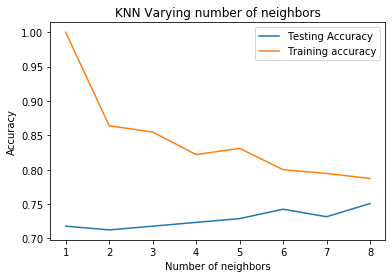

In [68]:
plt.title('KNN Varying number of neighbors')
plt.plot(n, test_accuracy, label='Testing Accuracy')
plt.plot(n, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### Normalize

In [69]:
X_norm = preprocessing.normalize(X,norm='l2')
X_norm

array([[0.06471612, 0.99790371],
       [0.04786175, 0.99885397],
       [0.05396569, 0.99854279],
       ...,
       [0.02785912, 0.99961186],
       [0.02469145, 0.99969512],
       [0.02776428, 0.9996145 ]])

In [70]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_norm, y, test_size=0.25)
new = neighbors.KNeighborsClassifier()
new.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
accuracy

0.6109589041095891

In [71]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       223
           1       0.00      0.00      0.00       142

    accuracy                           0.61       365
   macro avg       0.31      0.50      0.38       365
weighted avg       0.37      0.61      0.46       365



C:\Users\airwo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 

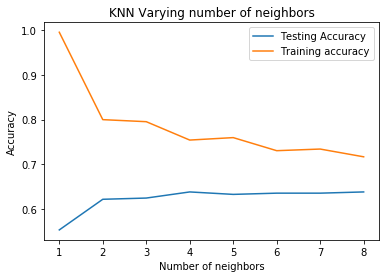

In [74]:
plt.title('KNN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### Analysis

My second machine learning algorithm that I used was K nearest neighbors. This time I used the garage area and lot area features. In this model I didn't predict the exact sales price, but I predicted if the features will lead to a sales price greater than the mean sales price or if the sales price would be less than the sales price.I approached this problem in two ways, one with the normal data set and the other way required me to normalize the data first before I fitted it into the model. I first had to replace all the values of sales prices with 0s and 1s. 1s being sales prices that were greater than the mean and 0s being salesp rices that were not going to be greater than the sales price. I splitted the data into test and training data into my k-nearest neighbors model. Here the accuracy was about 70%~. I then printed the classification report and was about to get the precision and recall for the sales price. Then I plotted the KNN accuracy when the parameters of the number off neighbors changed. It seems like the accuracy of the classifcation got worse for both testing and training data as the amount of neighbors increased. Both did seem to converage at 70%.
For the normalized data, my accuracy significantly changed for the worse. I thought it would increase but the accuracy went down 10%. I assume the numbers/values of the features weren't as far away from each other, so normalization wasn't needed.

# Naive Bayes Classifier 


In [75]:
temp.head()

,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SumBsmt,AvgFlr,SumGarage,MiscYes,greaterThanAvgLotArea
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,4,3,No,GLQ,706,Unf,0,150,GasA,Ex,Y,SBrkr,856,854,Gd,Typ,None,Attchd,RFn,548,3,3,Y,0,None,None,None,0,WD,Normal,7,855.0,6,False,False
2,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,4,3,Gd,ALQ,978,Unf,0,284,GasA,Ex,Y,SBrkr,1262,0,TA,Typ,TA,Attchd,RFn,460,3,3,Y,298,None,None,None,0,WD,Normal,7,631.0,6,False,False
3,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,4,3,Mn,GLQ,486,Unf,0,434,GasA,Ex,Y,SBrkr,920,866,Gd,Typ,TA,Attchd,RFn,608,3,3,Y,0,None,None,None,0,WD,Normal,7,893.0,6,False,True
4,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,3,4,No,ALQ,216,Unf,0,540,GasA,Gd,Y,SBrkr,961,756,Gd,Typ,Gd,Detchd,Unf,642,3,3,Y,0,None,None,None,0,WD,Abnorml,7,858.5,6,False,False
5,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,4,3,Av,GLQ,655,Unf,0,490,GasA,Ex,Y,SBrkr,1145,1053,Gd,Typ,TA,Attchd,RFn,836,3,3,Y,192,None,None,None,0,WD,Normal,7,1099.0,6,False,True


Temp is basically the table before it was hot encoding with get_dummies

In [76]:
trainNBC = pd.DataFrame({"BasementQuality": temp["BsmtQual"], "BasementCondition": temp["BsmtCond"], "BasementFinSF1": temp["BsmtFinSF1"], "BasementFinSF2": temp["BsmtFinSF2"], "BasementUnf": temp["BsmtUnfSF"]})

In [77]:
sp = np.array(trainSP)
sp = np.where(sp >= sp.mean(), 1 , 0)
Counter(sp)

Counter({1: 560, 0: 900})

In [78]:
trainNBC["sp"] = sp
trainNBC.replace("None",0,inplace=True)
trainNBC

,BasementQuality,BasementCondition,BasementFinSF1,BasementFinSF2,BasementUnf,sp
Id,,,,,,
1,4,3,706,0,150,1
2,4,3,978,0,284,1
3,4,3,486,0,434,1
4,3,4,216,0,540,0
5,4,3,655,0,490,1
...,...,...,...,...,...,...
1456,4,3,0,0,953,0
1457,4,3,790,163,589,1
1458,3,4,275,0,877,1


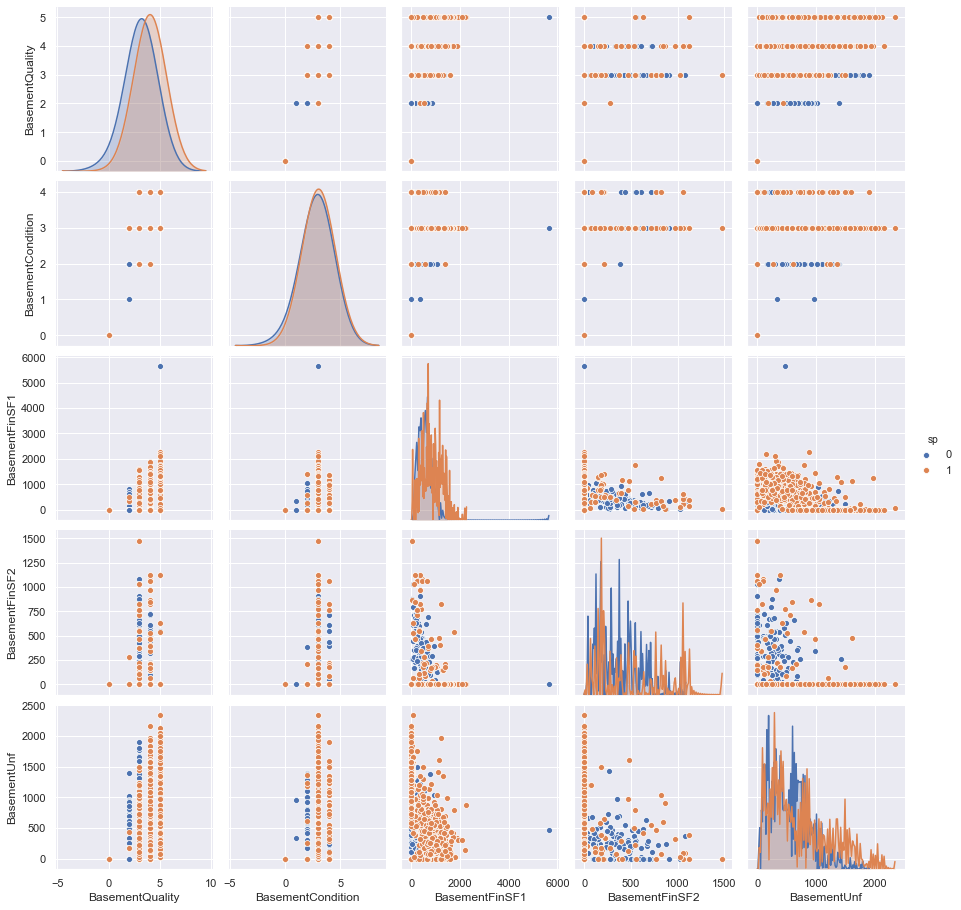

In [79]:
sns.set()
sns.pairplot(trainNBC,hue='sp', diag_kws={'bw': 1.5})
plt.show()

In [80]:
X_nbc = trainNBC.drop('sp',axis = 1)
X_nbc.shape

(1460, 5)

In [81]:
y_nbc = trainNBC['sp']
y_nbc.shape

(1460,)

In [82]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_nbc,y_nbc,random_state=9)

In [83]:
ytrain[ytrain.iloc[0:] == 0] = 'b'
ytrain[ytrain.iloc[0:] == 1] = 'r'

In [84]:
Xtrain.iloc[:,1:2]

,BasementCondition
Id,
1295,3
230,3
985,0
65,3
558,3
...,...
57,3
502,3
639,3


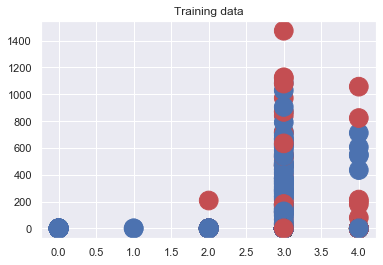

In [85]:
plt.scatter(Xtrain.iloc[:,1:2], Xtrain.iloc[:,3:4], c=ytrain[:], s=350, cmap='viridis')
plt.title('Training data')
plt.show()

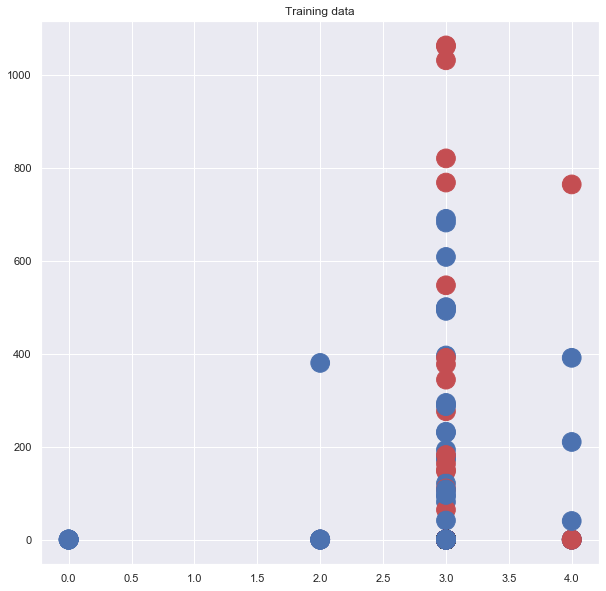

In [86]:
ytest[ytest.iloc[0:] == 1] = 'r'
ytest[ytest.iloc[0:] == 0] = 'b'

plt.figure(figsize=(10,10))
plt.scatter(Xtest.iloc[:,1:2], Xtest.iloc[:,3:4], c=ytest[:],s=350, cmap='viridis')
plt.title('Training data')
plt.show()

In [87]:
from sklearn.naive_bayes import GaussianNB 

model = GaussianNB()                       
model.fit(Xtrain, ytrain)    

GaussianNB(priors=None, var_smoothing=1e-09)

In [88]:
y_model = model.predict(Xtest)    

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.7561643835616438

In [90]:
Xtest.head()

,BasementQuality,BasementCondition,BasementFinSF1,BasementFinSF2,BasementUnf
Id,,,,,
1069,4,3,837,0,105
272,4,3,226,1063,96
40,0,0,0,0,0
776,5,3,866,0,338
248,3,3,0,0,1367


### Analysis

And finally, the last machine learning algorithm that I used was naive bayes classifier. Here, the features that I used for this model were all relevant and correlated to the basement area of the house. So data about the quaility, condition and square feet of both finished and unfinished basements. I also approached this problem with classification, so I did the same thing with the sales price and categorized it by higher than the mean and lower than the mean.  I assumed that the features I picked out are independent and that the presence of one particular feature does not affect the other. I split my data into training and testing sets once more. And then fit my training data into my algorithm model. I also plotted the different combinations of cateogries/columns against each other. It seems like after looking at the charts that condition and quality play a huge role when it comes to the sales prices. The sales prices is constantly greater than the mean when condition and quality is high. It also seems like the square feet played a role in the price even if it wasn't as significant. More square feet also equivalated to higher price. I then retrieved the accuracy which ended to be about 75%~.